In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("evaluation.csv")
df

,Unnamed: 0,player,mcts_simuls,mcts_rate,player_first,result_from_player,score_diff_from_player,moves
0,0,random,0,1.4,True,1,2,"[24, 27, 2, 17, 35, 13, 34, 30, 32, 10, 19, 14..."
1,1,random,0,1.4,False,0,0,"[33, 16, 3, 0, 7, 27, 31, 15, 28, 35, 34, 26, ..."
2,2,random,0,1.4,True,1,2,"[7, 22, 14, 20, 32, 2, 24, 31, 15, 12, 26, 9, ..."
3,3,random,0,1.4,False,-1,-2,"[26, 17, 30, 34, 23, 2, 11, 22, 4, 19, 25, 29,..."
4,4,random,0,1.4,True,-1,-2,"[7, 2, 1, 15, 14, 27, 5, 21, 10, 32, 35, 3, 31..."
...,...,...,...,...,...,...,...,...
475,475,hopeful-spaceship-20,250,1.4,False,-1,-3,"[32, 9, 26, 35, 20, 11, 19, 10, 21, 13, 22, 16..."
476,476,hopeful-spaceship-20,250,1.4,True,-1,-5,"[22, 2, 20, 28, 32, 21, 8, 27, 19, 15, 25, 17,..."
477,477,hopeful-spaceship-20,250,1.4,False,-1,-2,"[15, 32, 16, 35, 34, 10, 6, 2, 14, 8, 29, 13, ..."
478,478,hopeful-spaceship-20,250,1.4,True,-1,-3,"[22, 20, 8, 12, 9, 16, 25, 26, 13, 14, 35, 3, ..."


(-1.0, 1.0)

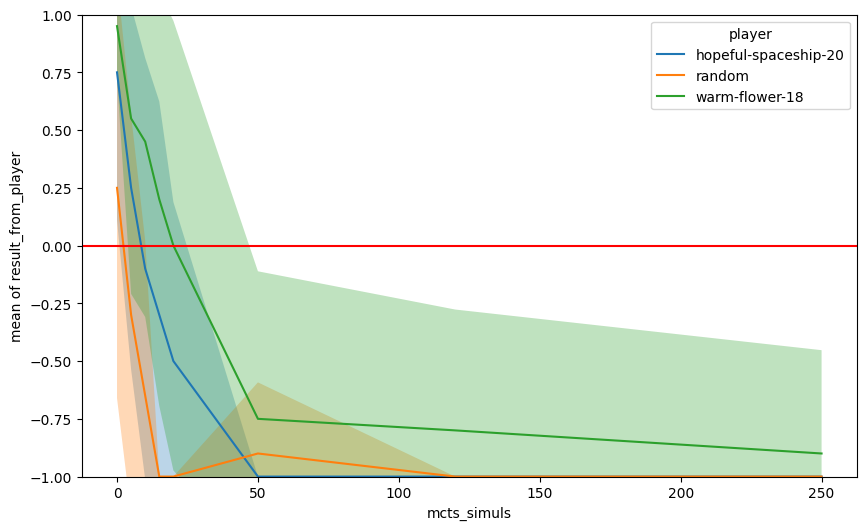

In [35]:
grouped = df.groupby(['player', 'mcts_simuls'])['result_from_player'].agg(['mean', 'std'])

pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
ax = pivoted.plot.line(figsize=(10, 6))

for player in pivoted.columns:
    y = pivoted[player]
    std = grouped.loc[player]["std"]
    ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

ax.set_xlabel('mcts_simuls')
ax.set_ylabel('mean of result_from_player')
plt.axhline(y=0, color='r', linestyle='-')
ax.set_ylim(-1, 1)

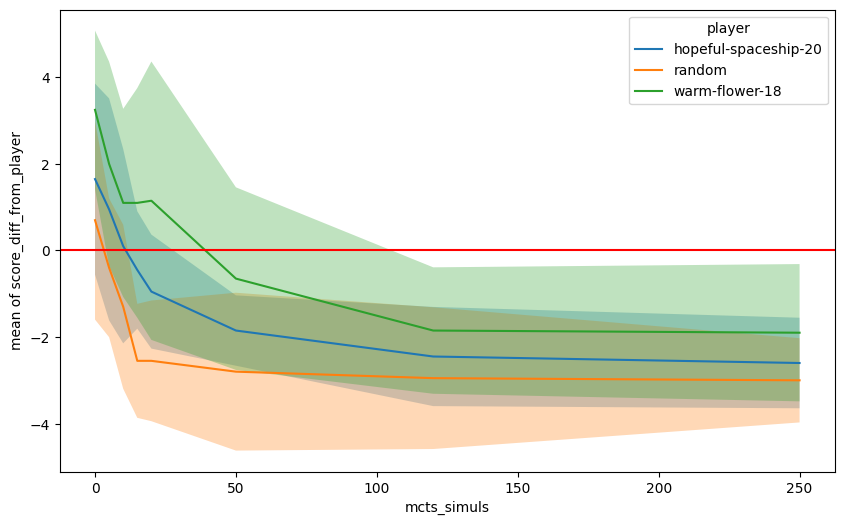

In [38]:
grouped = df.groupby(['player', 'mcts_simuls'])['score_diff_from_player'].agg(['mean', 'std'])

pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
ax = pivoted.plot.line(figsize=(10, 6))

for player in pivoted.columns:
    y = pivoted[player]
    std = grouped.loc[player]["std"]
    ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

ax.set_xlabel('mcts_simuls')
ax.set_ylabel('mean of score_diff_from_player')
plt.axhline(y=0, color='r', linestyle='-')
# ax.set_ylim(-1, 1)